**Rationale** In this assignment, you will practice specifying, running, and interpreting regressions involving non-linear functional forms and heterogeneous effects. You will be using the datasets located [here](https://drive.google.com/drive/folders/1SRMp4QhyXxfjOiR_CnbNQ1zMI1AuCjyp?usp=sharing).

1. Avocado dataset
1. Starbucks campaign data

In [ ]:
import pandas as pd, numpy as np, os, matplotlib.pyplot as plt
from statsmodels.formula import api as smf
from google.colab import drive
drive.mount('drive' )

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
fpath = '/content/drive/MyDrive/A7' # change to your data folder
os.listdir(fpath)

['starbucks_promos.csv', 'avocado.csv']

# Problem 1 (5 points) Avocado prices redux 

**Only use data for conventional types and remove the data for the region TotalUS**

First, write a loop through each unique region to plot the 
1. total volume vs. average price
1. total volume vs. average price$^2$
1. ln(Total Volume) vs average price
1. Total volume vs. ln(Average Price)
1. ln(Total Volume) vs ln(Average Price)

For each of the above 5 plots, the syntax should look something like:
```
for r in df.region.unique():
    temp = df[df.region==r]
    plt.scatter(....) # fill this in
```

1. Which of the plots of the relationship between price and demand looks most "linear?"

Using the avocado dataset, estimate the following demand models while accounting for the region effects (incl region in the regression):

1. level - level
1. level - Quadratic
1. level - log
1. log - level
1. log - log

Answer the following:
1. Succinctly interpret the **price coefficient** for each model (pay attention to corresponding p-values as well). 
1. Based on the log-log model, is the demand for avocados price elastic or inelastic? What does this mean?


Demand for avocados price elastic means prices can be low or high whatever the demand is. 

In [ ]:
# read in the dataset and replace column name spaces with underscores
avocado = pd.read_csv(fpath + '/avocado.csv', index_col = 0)
avocado.columns = [c.replace(' ', '_') for c in avocado.columns]

In [ ]:
avocado.head()

,Date,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
# select regions that are not TotalUS e.g. region != 'TotalUS' and only conventional types
avocado = avocado[avocado['region'] != 'TotalUS']
avocado = avocado[avocado['type'] == 'conventional']


In [ ]:
# check the unique regions to make sure TotalUS is not in the region column
avocado['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'West', 'WestTexNewMexico'], dtype=object)

In [ ]:
# check the unique types to make sure there are only conventional types
avocado['type'].unique()

array(['conventional'], dtype=object)

In [ ]:
import itertools

colors = itertools.cycle(["r", "b", "g"])

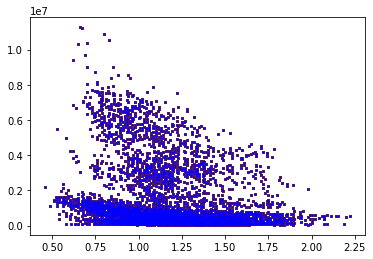

In [ ]:
# write a loop to plot average price vs total volume and color each region differently
# e.g.:
for r in avocado.region.unique():
    temp = avocado.loc[avocado.region == r]
    plt.scatter(avocado['AveragePrice'], avocado['Total_Volume'], s= 1, c = next(colors)) # <- change this, make sure price is on the x-axis



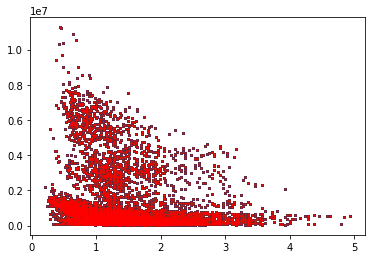

In [ ]:
# do the same, but now plot AveragePrice^2 vs Total_Volume
for r in avocado.region.unique():
    temp = avocado.loc[avocado.region == r]
    plt.scatter(avocado['AveragePrice']*avocado['AveragePrice'], avocado['Total_Volume'], s= 1, c = next(colors)) # <- change this, make sure price is on the x-axis

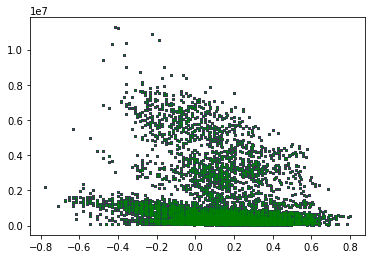

In [ ]:
# do the same, but now plot ln(average price) vs. total volume
# remember np.log() takes the log
for r in avocado.region.unique():
    temp = avocado.loc[avocado.region == r]
    plt.scatter(np.log(avocado['AveragePrice']), avocado['Total_Volume'], s= 1, c = next(colors)) # <- change this, make sure price is on the x-axis


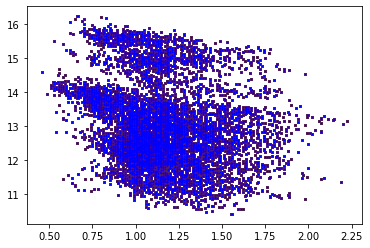

In [ ]:
# do the same, but now plot AveragePrice vs ln(Total_Volume)

for r in avocado.region.unique():
    temp = avocado.loc[avocado.region == r]
    plt.scatter(avocado['AveragePrice'], np.log(avocado['Total_Volume']), s= 1, c = next(colors)) # <- change this, make sure price is on the x-axis


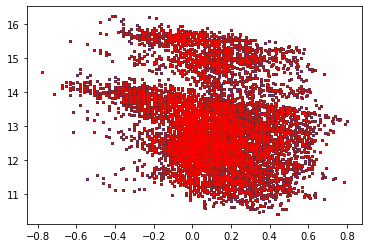

In [ ]:
# do the same, but now plot ln(AveragePrice) vs ln(Total_Volume)
for r in avocado.region.unique():
    temp = avocado.loc[avocado.region == r]
    plt.scatter(np.log(avocado['AveragePrice']), np.log(avocado['Total_Volume']), s= 1, c = next(colors)) # <- change this, make sure price is on the x-axis


**EDIT THIS CELL**

Which plot seems to exhibit the most linear relationship within each region? (i.e. dots of the same color seem to form closest to a straight line).

The plot that seems to exhibit the most linear relationship, is the ________AveragePrice^2___________ vs. _________Total_Volume__________ plot. This suggests that the __________quadratic__________ model may be most appropriate.

(*models can be level-level, quadratic, log-log, level-log, log-level.*)

In [ ]:
# run the level-level regression of Total Volume on Average Price 
# while accounting for regions as an additional explanatory variable.
res = smf.ols('Total_Volume ~AveragePrice + region', data=avocado).fit()

# print the regression table below
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Total_Volume   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     3232.
Date:                Tue, 02 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:33:22   Log-Likelihood:            -1.2705e+05
No. Observations:                8957   AIC:                         2.542e+05
Df Residuals:                    8903   BIC:                         2.546e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      8.707e+05   3.61e+04     24.128      0.000       8e+05    9.41e+05
region[T.Atlanta]              2.584e+05   3.85e+04      6.714      0.000    1.83e+05    3.34e+05
region[T.BaltimoreWashington]  6.781e+05   3.82e+04     17.764      0.000    6.03e+05    7.53e+05
region[T.Boise]               -1.673e+05   3.85e+04     -4.349      0.000   -2.43e+05   -9.19e+04
region[T.Boston]                4.43e+05   3.82e+04     11.604      0.000    3.68e+05    5.18e+05
region[T.BuffaloRochester]     5.685e+04   3.82e+04      1.489      0.136    -1.8e+04    1.32e+05
region[T.California]           5.705e+06   3.84e+04    148.511      0.000    5.63e+06    5.78e+06
region[T.Charlotte]            6.794e+04   3.82e+04      1.779      0.075   -6927.768    1.43e+05
region[T.Chicago]              6.788e+05   3.82e+04     17.781      0.000    6.04e+05    7.54e+05
region[T.CincinnatiDayton]    -3.726e+04   3.86e+04     -0.964      0.335   -1.13e+05    3.85e+04
region[T.Columbus]            -8.654e+04   3.85e+04     -2.248      0.025   -1.62e+05   -1.11e+04
region[T.DallasFtWorth]        8.299e+05   3.92e+04     21.170      0.000    7.53e+05    9.07e+05
region[T.Denver]               5.345e+05   3.85e+04     13.890      0.000    4.59e+05     6.1e+05
region[T.Detroit]              1.369e+05   3.84e+04      3.567      0.000    6.17e+04    2.12e+05
region[T.GrandRapids]          6.879e+04   3.82e+04      1.802      0.072   -6045.467    1.44e+05
region[T.GreatLakes]           3.169e+06   3.83e+04     82.776      0.000    3.09e+06    3.24e+06
region[T.HarrisburgScranton]   9.375e+04   3.82e+04      2.454      0.014    1.89e+04    1.69e+05
region[T.HartfordSpringfield]  2.316e+05   3.82e+04      6.065      0.000    1.57e+05    3.06e+05
region[T.Houston]              7.838e+05   3.93e+04     19.950      0.000    7.07e+05    8.61e+05
region[T.Indianapolis]        -3.622e+04   3.83e+04     -0.945      0.345   -1.11e+05    3.89e+04
region[T.Jacksonville]        -1.512e+04   3.83e+04     -0.395      0.693   -9.01e+04    5.99e+04
region[T.LasVegas]             2.565e+04   3.86e+04      0.664      0.507   -5.01e+04    1.01e+05
region[T.LosAngeles]           2.618e+06   3.87e+04     67.590      0.000    2.54e+06    2.69e+06
region[T.Louisville]           -1.41e+05   3.84e+04     -3.669      0.000   -2.16e+05   -6.56e+04
region[T.MiamiFtLauderdale]    4.267e+05   3.82e+04     11.166      0.000    3.52e+05    5.02e+05
region[T.Midsouth]             2.727e+06   3.83e+04     71.285      0.000    2.65e+06     2.8e+06
region[T.Nashville]           -8.397e+04   3.86e+04     -2.173      0.030    -1.6e+05   -8233.353
region[T.NewOrleansMobile]     2.181e+04   3.85e+04      0.567      0.571   -5.36e+04    9.72e+04
region[T.NewYork]              1.309e+06   3.

**Edit this cell**

For the level-level regression, explain the coefficient for the price variable:

1. Answer here:

coef have the value -5.767e+05 with std err =	1.78e+04, t =	-32.471	, P>|t| = 0.000	and interval [0.25 0.75] = [6.12e+05	-5.42e+05]


In [ ]:
# run the quadratic regression of Total Volume on Average Price and Average Price ^2
# while accounting for regions as an additional explanatory variable.
res = smf.ols('Total_Volume ~AveragePrice*AveragePrice + region', data=avocado).fit()

# print the regression table below
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Total_Volume   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     3232.
Date:                Tue, 02 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:33:40   Log-Likelihood:            -1.2705e+05
No. Observations:                8957   AIC:                         2.542e+05
Df Residuals:                    8903   BIC:                         2.546e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      8.707e+05   3.61e+04     24.128      0.000       8e+05    9.41e+05
region[T.Atlanta]              2.584e+05   3.85e+04      6.714      0.000    1.83e+05    3.34e+05
region[T.BaltimoreWashington]  6.781e+05   3.82e+04     17.764      0.000    6.03e+05    7.53e+05
region[T.Boise]               -1.673e+05   3.85e+04     -4.349      0.000   -2.43e+05   -9.19e+04
region[T.Boston]                4.43e+05   3.82e+04     11.604      0.000    3.68e+05    5.18e+05
region[T.BuffaloRochester]     5.685e+04   3.82e+04      1.489      0.136    -1.8e+04    1.32e+05
region[T.California]           5.705e+06   3.84e+04    148.511      0.000    5.63e+06    5.78e+06
region[T.Charlotte]            6.794e+04   3.82e+04      1.779      0.075   -6927.768    1.43e+05
region[T.Chicago]              6.788e+05   3.82e+04     17.781      0.000    6.04e+05    7.54e+05
region[T.CincinnatiDayton]    -3.726e+04   3.86e+04     -0.964      0.335   -1.13e+05    3.85e+04
region[T.Columbus]            -8.654e+04   3.85e+04     -2.248      0.025   -1.62e+05   -1.11e+04
region[T.DallasFtWorth]        8.299e+05   3.92e+04     21.170      0.000    7.53e+05    9.07e+05
region[T.Denver]               5.345e+05   3.85e+04     13.890      0.000    4.59e+05     6.1e+05
region[T.Detroit]              1.369e+05   3.84e+04      3.567      0.000    6.17e+04    2.12e+05
region[T.GrandRapids]          6.879e+04   3.82e+04      1.802      0.072   -6045.467    1.44e+05
region[T.GreatLakes]           3.169e+06   3.83e+04     82.776      0.000    3.09e+06    3.24e+06
region[T.HarrisburgScranton]   9.375e+04   3.82e+04      2.454      0.014    1.89e+04    1.69e+05
region[T.HartfordSpringfield]  2.316e+05   3.82e+04      6.065      0.000    1.57e+05    3.06e+05
region[T.Houston]              7.838e+05   3.93e+04     19.950      0.000    7.07e+05    8.61e+05
region[T.Indianapolis]        -3.622e+04   3.83e+04     -0.945      0.345   -1.11e+05    3.89e+04
region[T.Jacksonville]        -1.512e+04   3.83e+04     -0.395      0.693   -9.01e+04    5.99e+04
region[T.LasVegas]             2.565e+04   3.86e+04      0.664      0.507   -5.01e+04    1.01e+05
region[T.LosAngeles]           2.618e+06   3.87e+04     67.590      0.000    2.54e+06    2.69e+06
region[T.Louisville]           -1.41e+05   3.84e+04     -3.669      0.000   -2.16e+05   -6.56e+04
region[T.MiamiFtLauderdale]    4.267e+05   3.82e+04     11.166      0.000    3.52e+05    5.02e+05
region[T.Midsouth]             2.727e+06   3.83e+04     71.285      0.000    2.65e+06     2.8e+06
region[T.Nashville]           -8.397e+04   3.86e+04     -2.173      0.030    -1.6e+05   -8233.353
region[T.NewOrleansMobile]     2.181e+04   3.85e+04      0.567      0.571   -5.36e+04    9.72e+04
region[T.NewYork]              1.309e+06   3.

**Edit this cell**

For the quadratic regression, explain the marginal effect of price (1 unit change in price leads to...) for the quadratic regression. Remember, you must consider that when price changes, so does price$^2$:

1. Answer here: -5.767e+05 unit change in Total_Volume

In [ ]:
# run the log-level regression of Total Volume on Average Price 
# while accounting for regions as an additional explanatory variable.
res = smf.ols('np.log(Total_Volume) ~AveragePrice + region', data=avocado).fit()

# print the regression table below
res.summary()

# print the regression table below



<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Total_Volume)   R-squared:                       0.975
Model:                              OLS   Adj. R-squared:                  0.975
Method:                   Least Squares   F-statistic:                     6552.
Date:                  Tue, 02 Nov 2021   Prob (F-statistic):               0.00
Time:                          19:35:06   Log-Likelihood:                 2047.2
No. Observations:                  8957   AIC:                            -3986.
Df Residuals:                      8903   BIC:                            -3603.
Df Model:                            53                                         
Covariance Type:              nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        12.1701      0.020    612.758      0.000      12.131      12.209
region[T.Atlanta]                 1.5741      0.021     74.299      0.000       1.533       1.616
region[T.BaltimoreWashington]     2.1526      0.021    102.463      0.000       2.111       2.194
region[T.Boise]                  -0.2486      0.021    -11.741      0.000      -0.290      -0.207
region[T.Boston]                  1.8056      0.021     85.929      0.000       1.764       1.847
region[T.BuffaloRochester]        0.3783      0.021     18.004      0.000       0.337       0.419
region[T.California]              4.0485      0.021    191.488      0.000       4.007       4.090
region[T.Charlotte]               0.7698      0.021     36.619      0.000       0.729       0.811
region[T.Chicago]                 2.1401      0.021    101.867      0.000       2.099       2.181
region[T.CincinnatiDayton]        0.8165      0.021     38.408      0.000       0.775       0.858
region[T.Columbus]                0.4566      0.021     21.549      0.000       0.415       0.498
region[T.DallasFtWorth]           2.3154      0.022    107.324      0.000       2.273       2.358
region[T.Denver]                  2.0047      0.021     94.657      0.000       1.963       2.046
region[T.Detroit]                 1.2354      0.021     58.485      0.000       1.194       1.277
region[T.GrandRapids]             0.6192      0.021     29.475      0.000       0.578       0.660
region[T.GreatLakes]              3.5204      0.021    167.070      0.000       3.479       3.562
region[T.HarrisburgScranton]      0.9253      0.021     44.007      0.000       0.884       0.967
region[T.HartfordSpringfield]     1.2018      0.021     57.184      0.000       1.161       1.243
region[T.Houston]                 2.2664      0.022    104.817      0.000       2.224       2.309
region[T.Indianapolis]            0.5378      0.021     25.485      0.000       0.496       0.579
region[T.Jacksonville]            0.5027      0.021     23.868      0.000       0.461       0.544
region[T.LasVegas]                1.0449      0.021     49.140      0.000       1.003       1.087
region[T.LosAngeles]              3.2630      0.021    153.041      0.000       3.221       3.305
region[T.Louisville]             -0.1233      0.021     -5.830      0.000      -0.165      -0.082
region[T.MiamiFtLauderdale]       1.7724      0.021     84.284      0.000       1.731       1.814
region[T.Midsouth]                3.3930      0.021    161.159      0.000       3.352       3.434
region[T.Nashville]               0.6027      0.021     28.346      0.000       0.561       0.644
region[T.NewOrleansMobile]        0.9266      0.021     43.779      0.000       0.885       0.968
region[T.NewYork]      

**Edit this cell**

For the log-level regression, explain the coefficient for the price variable:

1. Answer here:

coef have the value -5.767e+05 with std err =	1.78e+04, t =	-32.471	, P>|t| = 0.000	and interval [0.25 0.75] = [6.12e+05	-5.42e+05]



In [ ]:
# run the level-log regression of Total Volume on Average Price 
# while accounting for regions as an additional explanatory variable.
res = smf.ols('Total_Volume ~np.log(AveragePrice) + region', data=avocado).fit()


# print the regression table below
res.summary()

# print the regression table below


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Total_Volume   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     3308.
Date:                Tue, 02 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:35:22   Log-Likelihood:            -1.2695e+05
No. Observations:                8957   AIC:                         2.540e+05
Df Residuals:                    8903   BIC:                         2.544e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      3.072e+05   2.74e+04     11.228      0.000    2.54e+05    3.61e+05
region[T.Atlanta]              2.454e+05   3.81e+04      6.447      0.000    1.71e+05     3.2e+05
region[T.BaltimoreWashington]  6.784e+05   3.78e+04     17.969      0.000    6.04e+05    7.52e+05
region[T.Boise]               -1.886e+05   3.81e+04     -4.952      0.000   -2.63e+05   -1.14e+05
region[T.Boston]               4.428e+05   3.78e+04     11.727      0.000    3.69e+05    5.17e+05
region[T.BuffaloRochester]     6.139e+04   3.78e+04      1.626      0.104   -1.26e+04    1.35e+05
region[T.California]           5.691e+06    3.8e+04    149.773      0.000    5.62e+06    5.77e+06
region[T.Charlotte]            6.891e+04   3.78e+04      1.825      0.068   -5126.720    1.43e+05
region[T.Chicago]              6.678e+05   3.78e+04     17.688      0.000    5.94e+05    7.42e+05
region[T.CincinnatiDayton]     -6.46e+04   3.83e+04     -1.689      0.091    -1.4e+05    1.04e+04
region[T.Columbus]            -1.011e+05   3.81e+04     -2.654      0.008   -1.76e+05   -2.64e+04
region[T.DallasFtWorth]        7.717e+05    3.9e+04     19.793      0.000    6.95e+05    8.48e+05
region[T.Denver]               5.191e+05   3.81e+04     13.638      0.000    4.45e+05    5.94e+05
region[T.Detroit]              1.265e+05    3.8e+04      3.332      0.001    5.21e+04    2.01e+05
region[T.GrandRapids]          5.765e+04   3.78e+04      1.527      0.127   -1.64e+04    1.32e+05
region[T.GreatLakes]           3.165e+06   3.79e+04     83.604      0.000    3.09e+06    3.24e+06
region[T.HarrisburgScranton]   9.798e+04   3.78e+04      2.594      0.010    2.39e+04    1.72e+05
region[T.HartfordSpringfield]  2.301e+05   3.78e+04      6.093      0.000    1.56e+05    3.04e+05
region[T.Houston]              7.161e+05   3.91e+04     18.292      0.000    6.39e+05    7.93e+05
region[T.Indianapolis]        -4.363e+04   3.79e+04     -1.151      0.250   -1.18e+05    3.07e+04
region[T.Jacksonville]        -2.363e+04   3.79e+04     -0.624      0.532   -9.78e+04    5.06e+04
region[T.LasVegas]             3991.8179   3.82e+04      0.104      0.917    -7.1e+04    7.89e+04
region[T.LosAngeles]            2.58e+06   3.84e+04     67.181      0.000    2.51e+06    2.66e+06
region[T.Louisville]          -1.523e+05    3.8e+04     -4.009      0.000   -2.27e+05   -7.78e+04
region[T.MiamiFtLauderdale]    4.212e+05   3.78e+04     11.145      0.000    3.47e+05    4.95e+05
region[T.Midsouth]             2.729e+06   3.78e+04     72.163      0.000    2.66e+06     2.8e+06
region[T.Nashville]           -1.047e+05   3.82e+04     -2.740      0.006    -1.8e+05   -2.98e+04
region[T.NewOrleansMobile]     7022.8376    3.8e+04      0.185      0.854   -6.75e+04    8.16e+04
region[T.NewYork]              1.306e+06   3.

**Edit this cell**

For the level-log regression, explain the coefficient for the price variable:

1. Answer here:

coef have the value -7.48e+05 with std err =2.09e+04, t =	-35.727	, P>|t| = 0.000	and interval [0.25 0.75] = [-7.89e+05	-7.07e+05]

In [ ]:
# run the log-log regression of Total Volume on Average Price 
# while accounting for regions as an additional explanatory variable.
res = smf.ols('np.log(Total_Volume) ~np.log(AveragePrice) + region', data=avocado).fit()

# print the regression table below
res.summary()

# print the regression table below



<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Total_Volume)   R-squared:                       0.976
Model:                              OLS   Adj. R-squared:                  0.976
Method:                   Least Squares   F-statistic:                     6817.
Date:                  Tue, 02 Nov 2021   Prob (F-statistic):               0.00
Time:                          19:35:31   Log-Likelihood:                 2220.8
No. Observations:                  8957   AIC:                            -4334.
Df Residuals:                      8903   BIC:                            -3950.
Df Model:                            53                                         
Covariance Type:              nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        11.5966      0.015    776.570      0.000      11.567      11.626
region[T.Atlanta]                 1.5676      0.021     75.451      0.000       1.527       1.608
region[T.BaltimoreWashington]     2.1529      0.021    104.485      0.000       2.113       2.193
region[T.Boise]                  -0.2632      0.021    -12.663      0.000      -0.304      -0.222
region[T.Boston]                  1.8063      0.021     87.650      0.000       1.766       1.847
region[T.BuffaloRochester]        0.3819      0.021     18.532      0.000       0.342       0.422
region[T.California]              4.0404      0.021    194.821      0.000       4.000       4.081
region[T.Charlotte]               0.7723      0.021     37.463      0.000       0.732       0.813
region[T.Chicago]                 2.1291      0.021    103.328      0.000       2.089       2.169
region[T.CincinnatiDayton]        0.7974      0.021     38.196      0.000       0.756       0.838
region[T.Columbus]                0.4487      0.021     21.591      0.000       0.408       0.489
region[T.DallasFtWorth]           2.2702      0.021    106.687      0.000       2.228       2.312
region[T.Denver]                  1.9959      0.021     96.069      0.000       1.955       2.037
region[T.Detroit]                 1.2302      0.021     59.384      0.000       1.190       1.271
region[T.GrandRapids]             0.6090      0.021     29.552      0.000       0.569       0.649
region[T.GreatLakes]              3.5200      0.021    170.363      0.000       3.480       3.561
region[T.HarrisburgScranton]      0.9314      0.021     45.173      0.000       0.891       0.972
region[T.HartfordSpringfield]     1.1991      0.021     58.175      0.000       1.159       1.239
region[T.Houston]                 2.2124      0.021    103.553      0.000       2.171       2.254
region[T.Indianapolis]            0.5351      0.021     25.858      0.000       0.495       0.576
region[T.Jacksonville]            0.4979      0.021     24.100      0.000       0.457       0.538
region[T.LasVegas]                1.0313      0.021     49.424      0.000       0.990       1.072
region[T.LosAngeles]              3.2344      0.021    154.288      0.000       3.193       3.275
region[T.Louisville]             -0.1289      0.021     -6.218      0.000      -0.170      -0.088
region[T.MiamiFtLauderdale]       1.7691      0.021     85.775      0.000       1.729       1.810
region[T.Midsouth]                3.3981      0.021    164.633      0.000       3.358       3.439
region[T.Nashville]               0.5900      0.021     28.278      0.000       0.549       0.631
region[T.NewOrleansMobile]        0.9181      0.021     44.219      0.000       0.877       0.959
region[T.NewYork]      

**Edit this cell**

For the log-log regression, explain the meaning of the coefficient for the price variable:

1. Answer here: 

For every 1 unit change in price Total_Average will change -0.7222 units

Based on the log-log regression, are avocados price-elastic or inelastic? What does this mean?

1. Answer here:

prices are elastic means prices can be low or high Total_Average is.  



# Problem 2 (5 points)

Use the Starbucks promotions data. Filter the data to use only the rows satisfying all of the following conditions:

1. Transaction amount more than 0 and less than 50.
1. Income is not missing (df.income.notnull())

We suspect the average transaction value might be higher for individuals with higher incomes. We also suspect that the higher the offer difficulty (min. amount spend needed to redeem), the higher the spend. However, this effect might be different depending on income. Additionally, the offer type (buy one get one vs. discount) may impact the transaction amount. Moreover, this effect of the offer type may differ depending on income.

1. To capture all of these potential effects, run the following regression: 
$$
ln(\text{Trans Amt}) = \beta_0 + \beta_1 ln(\text{Inc}) + \beta_2 \text{difficulty} + \beta_3 \text{Disc Offer} + \beta_4 ln(\text{Inc})\times \text{difficulty} + \beta_5  ln(\text{Inc})\times \text{Disc Offer}+ e
$$

1. Succinctly interpret the regression results.

**Edit this cell**

Demonstrate your understanding of interpretation of the regression here by filling the blanks in the statements below:

1. In terms of the $\beta's$ in the equation above, 1% increase in income when discount offer is made and qualification difficulty is \$10 leads to approximately ____ $\beta_2$ ____% change in transaction amount. 
1. In terms of the $\beta's$ in the equation above, 1% increase in income when BOGO offer is made and qualification difficulty is \$5 leads to approximately _____$\beta_2 + \beta_3$_____% change in transaction amount. 

**Remember** the solution here is not as simple as looking at a single coefficient. The effect of income depends on offer type and difficulty.

Note, you can re-write the equation as:
$$
ln(\text{Trans Amt}) = \beta_0  + \beta_2 \text{difficulty} + \beta_3 \text{Disc Offer}  + \big[\beta_1 + \beta_4 \text{difficulty} + \beta_5 \text{Disc Offer}  \big] \times ln(\text{Inc})+ e
$$

Where the entire effect of $ln(income)$ on $ln(TransactionAmount)$ is captured by the expression $\big[\beta_1 + \beta_4 \text{difficulty} + \beta_5 \text{Disc Offer}  \big]$.

In [ ]:
sb = pd.read_csv(fpath + '/starbucks_promos.csv', index_col=0) # read the starbucks data

In [ ]:
sb.head()

,uid,event,time,gender,age,register_date,income,offer_id,offer_reward,channels,difficulty,duration,offer_type,offer_time,transaction_amount,redeem_time,redeemed
1,0020c2b971eb4e9188eac86d93036a77,offer received,0,F,59,20160304,90000.0,fafdcd668e3743c1bb461111dcafc2a4,2.0,"['web', 'email', 'mobile', 'social']",10.0,240.0,discount,0.0,17.63,54.0,1
4,005500a7188546ff8a767329a2f7c76a,offer received,0,M,56,20171209,47000.0,ae264e3637204a6fb9bb56bc8210ddfd,10.0,"['email', 'mobile', 'social']",10.0,168.0,bogo,0.0,NaN,NaN,0
5,0056df74b63b4298809f0b375a304cf4,offer received,0,M,54,20160821,91000.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,"['web', 'email', 'mobile']",5.0,168.0,bogo,0.0,27.86,132.0,1
6,00715b6e55c3431cb56ff7307eb19675,offer received,0,F,58,20171207,119000.0,ae264e3637204a6fb9bb56bc8210ddfd,10.0,"['email', 'mobile', 'social']",10.0,168.0,bogo,0.0,27.26,12.0,1
8,00840a2ca5d2408e982d56544dc14ffd,offer received,0,M,26,20141221,61000.0,2906b810c7d4411798c6938adc9daaa5,2.0,"['web', 'email', 'mobile']",10.0,168.0,discount,0.0,6.05,540.0,1


In [ ]:
# select rows with transactions >0 but <50 and income is not missing
# replace sb with the result of the selection

sb = sb [sb['transaction_amount']<50]
sb = sb [sb['transaction_amount']>0]
sb = sb [sb['income']!=""]

In [ ]:
# run the regression here, store the result as the variable res
res = smf.ols('np.log(transaction_amount) ~income + difficulty + offer_type + (difficulty + offer_type)', data=sb).fit()



In [ ]:
# print the result summary here, e.g. print(res.summary()):
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     np.log(transaction_amount)   R-squared:                       0.397
Model:                                    OLS   Adj. R-squared:                  0.397
Method:                         Least Squares   F-statistic:                     6748.
Date:                        Tue, 02 Nov 2021   Prob (F-statistic):               0.00
Time:                                17:41:16   Log-Likelihood:                -21451.
No. Observations:                       30695   AIC:                         4.291e+04
Df Residuals:                           30691   BIC:                         4.294e+04
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.3916      0.011    127.458      0.000       1.370       1.413
offer_type[T.discount]    -0.2065      0.006    -32.822      0.000      -0.219      -0.194
income                  1.715e-05   1.29e-07    132.795      0.000    1.69e-05    1.74e-05
difficulty                 0.0250      0.001     34.050      0.000       0.024       0.026
==============================================================================
Omnibus:                     8593.637   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31698.374
Skew:                          -1.373   Prob(JB):                         0.00
Kurtosis:                       7.152   Cond. No.                     2.85e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Edit this cell**

Demonstrate your understanding of interpretation of the regression here by filling the blanks in the statements below:

1. In terms of the the estimated coefficients, 1% increase in income when discount offer is made and qualification difficulty is \$10 leads to approximately ____39.7____% **increase** in transaction amount. 
1. In terms of the estimated coefficients, 1% increase in income when BOGO offer is made and qualification difficulty is \$5 leads to ____2.50____% **idecrease ** in transaction amount. 

**Basically,** substitute the $\beta's$ from the answer above with the estimated coefficients.